In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('play_tennis_dataset.csv')


In [15]:
df.head()

,Day,Outlook,Temperature,Humidity,Wind,Play
0,D1,Overcast,Mild,Normal,Strong,Yes
1,D2,Sunny,Mild,Normal,Strong,Yes
2,D3,NaN,Mild,High,Strong,No
3,D4,Sunny,Mild,High,Weak,Yes
4,D5,Sunny,Cool,Normal,Strong,Yes


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
categorical_columns = ['Outlook','Temperature','Humidity','Wind']
df = pd.get_dummies(df,columns = categorical_columns,drop_first=True)

In [6]:
df.head()

,Day,Play,Outlook_Rainy,Outlook_Sunny,Temperature_Hot,Temperature_Mild,Humidity_Normal,Wind_Weak
0,D1,Yes,False,False,False,True,True,False
1,D2,Yes,False,True,False,True,True,False
2,D3,No,False,False,False,True,False,False
3,D4,Yes,False,True,False,True,False,True
4,D5,Yes,False,True,False,False,True,False


In [7]:
le = LabelEncoder()
df['Play'] = le.fit_transform(df['Play'])

In [8]:
df.drop('Day',axis=1,inplace=True)

In [9]:
df.head()

,Play,Outlook_Rainy,Outlook_Sunny,Temperature_Hot,Temperature_Mild,Humidity_Normal,Wind_Weak
0,1,False,False,False,True,True,False
1,1,False,True,False,True,True,False
2,0,False,False,False,True,False,False
3,1,False,True,False,True,False,True
4,1,False,True,False,False,True,False


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('Play',axis = 1)
y = df['Play']

C:\Users\AKHILESH\AppData\Local\Temp\ipykernel_22092\1405424493.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Play'], data=df, palette='Set2')


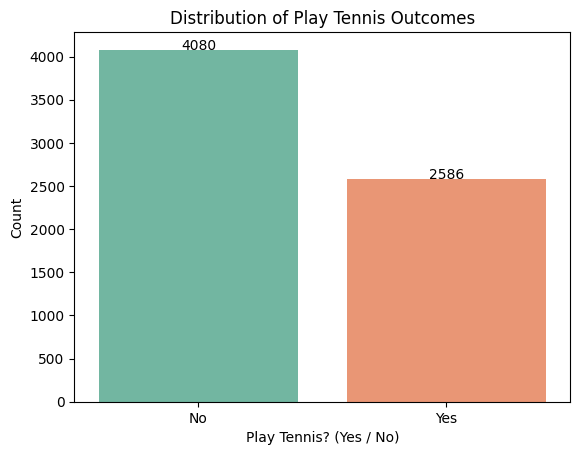

In [18]:
sns.countplot(x=df['Play'], data=df, palette='Set2')
plt.xlabel('Play Tennis? (Yes / No)')
plt.ylabel('Count')
plt.title('Distribution of Play Tennis Outcomes')

# Add count values on bars
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2,
             p.get_height() + 0.1,        # slight space above bar
             int(p.get_height()),
             ha='center')

plt.xticks([0, 1], ['No', 'Yes'])  # If your dataset encodes Play as No/Yes
plt.show()


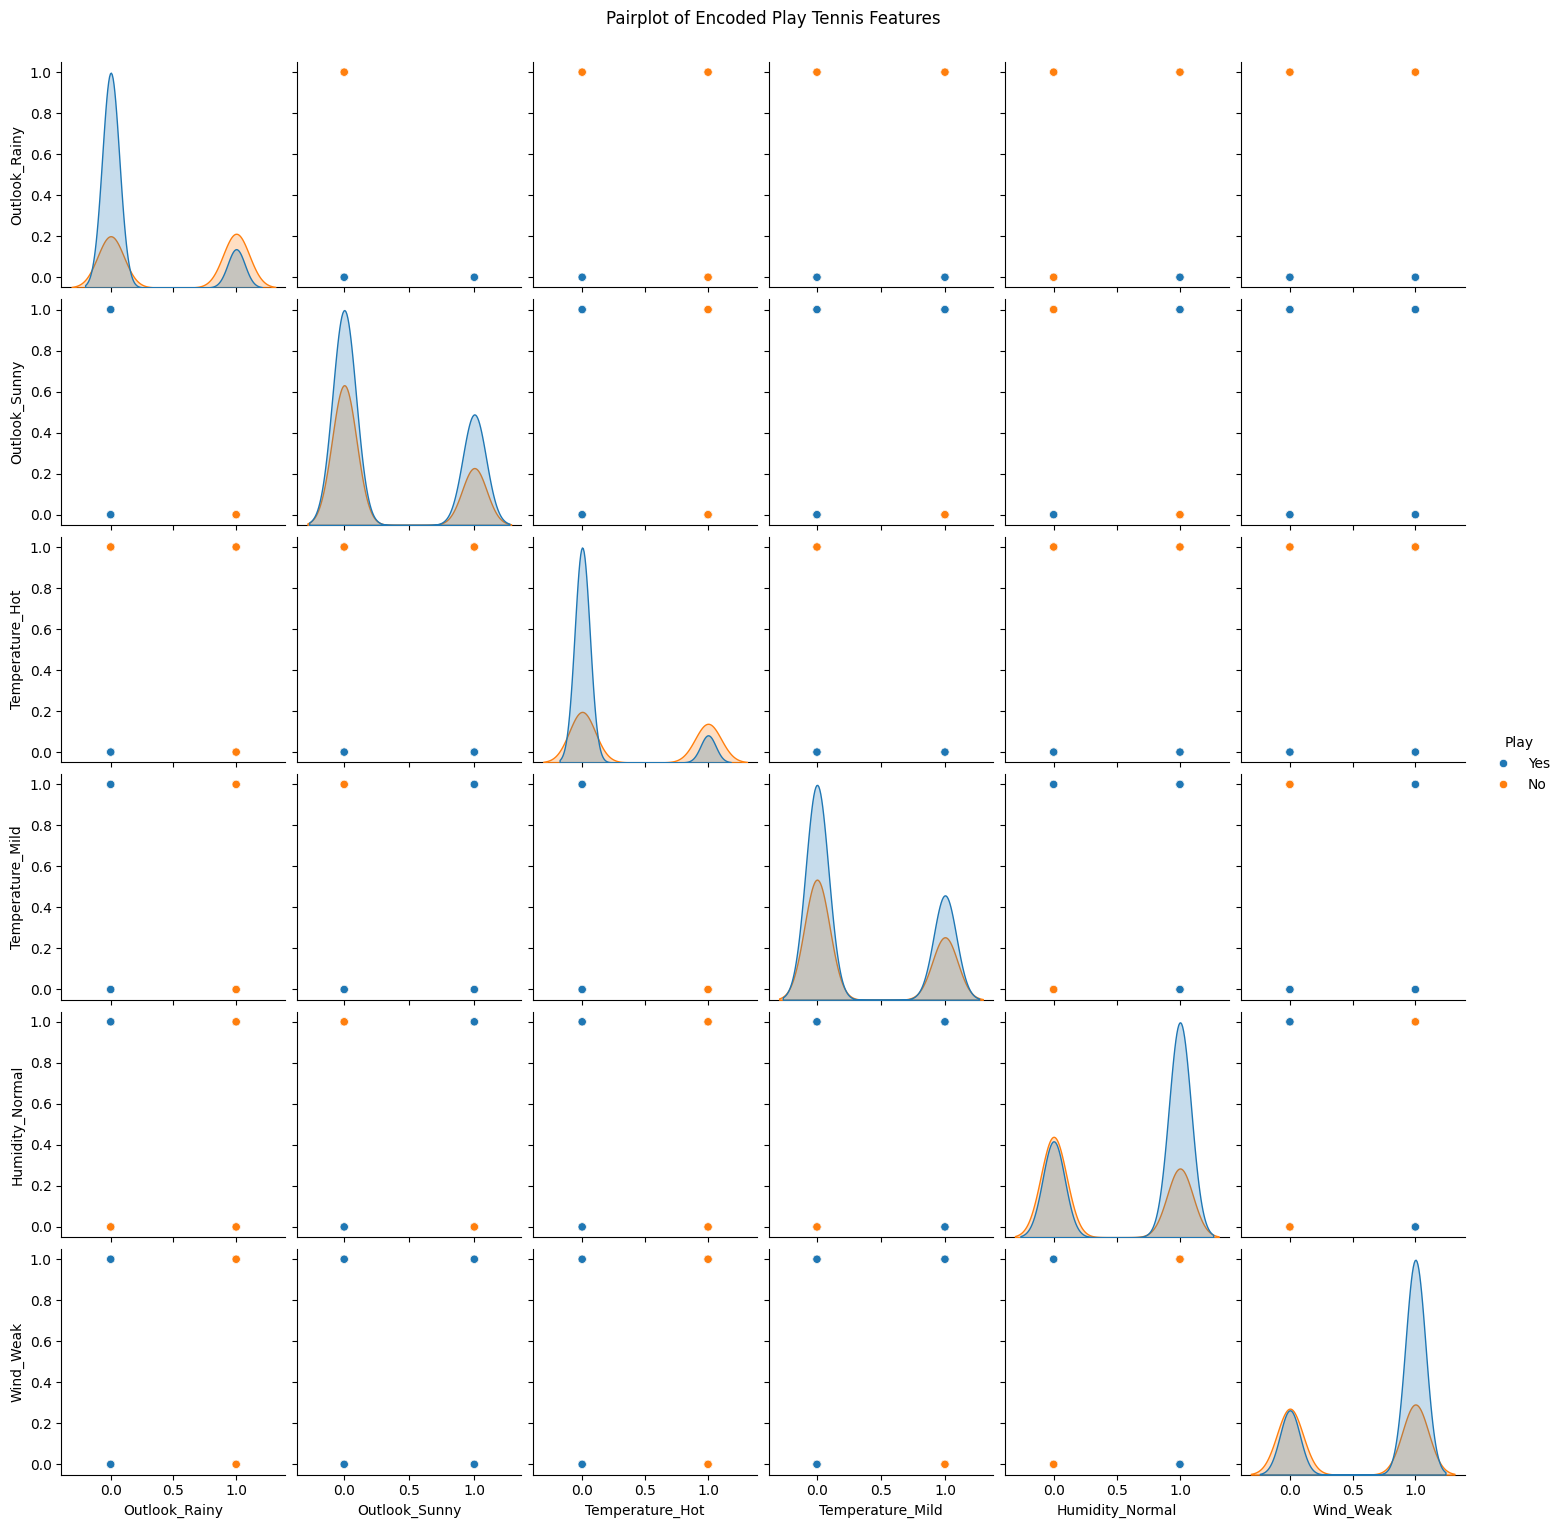

In [19]:
sns.pairplot(df, hue='Play', diag_kind='kde')
plt.suptitle("Pairplot of Encoded Play Tennis Features", y=1.02)
plt.show()


<Axes: xlabel='Outlook_Rainy', ylabel='count'>

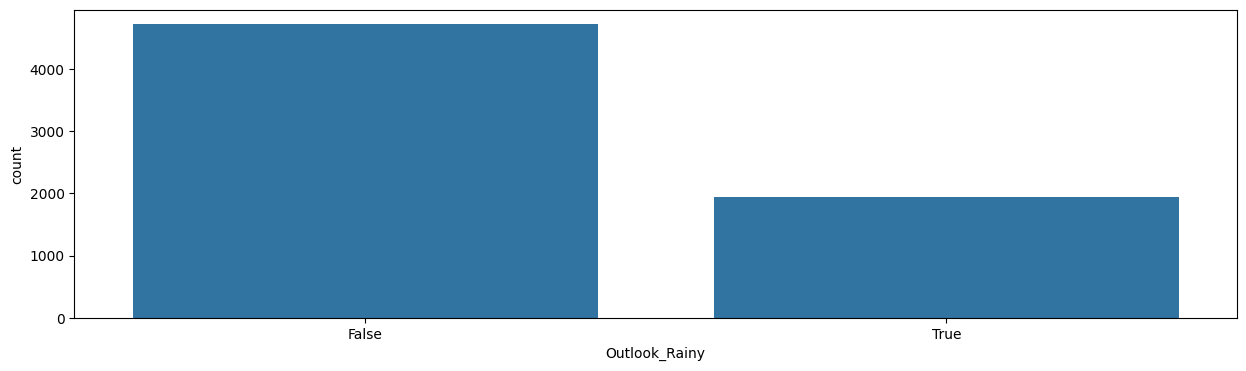

In [20]:
plt.figure(figsize=(15, 4))
sns.countplot(x='Outlook_Rainy', data=df)

In [ ]:
plt.figure(figsize=(15, 4))
sns.countplot(x='Outlook_Sunny', data=df)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X, y)

In [ ]:
dt.fit(X_train,y_train)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score

In [ ]:
accuracy_score(y_pred,y_test)